**Importing Modules**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

**Reading csv files**

In [4]:
temp_df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", parse_dates=["dt"])
income_df = pd.read_csv("worldbank_classification.csv")
co2_df = pd.read_csv("co2_emissions_kt_by_country.csv")

**Cleaning temperature dataset**

In [6]:
temp_df["Year"] = temp_df["dt"].dt.year
temp_df = temp_df[temp_df["Year"] >= 1960]
temp_df = temp_df.dropna(subset=["AverageTemperature"])

**Aggregating to annual mean temperature per country**

In [8]:
temp_annual = (
    temp_df.groupby(["Country", "Year"])["AverageTemperature"]
    .mean()
    .reset_index()
    .rename(columns={"AverageTemperature": "MeanTemp"})
)

**Cleaning CO2 dataset**

In [10]:
co2_df = co2_df.rename(columns={
    "country_name": "Country",
    "year": "Year",
    "value": "CO2_kt"
})
co2_df = co2_df[co2_df["Year"] >= 1960]

**Standardizing country names**

In [12]:
rename_map = {
    "Congo": "Congo, Rep.",
    "Democratic Republic of the Congo": "Congo, Dem. Rep.",
    "Bahamas": "Bahamas, The",
    "Gambia": "Gambia, The",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Slovak Republic": "Slovakia",
    "Egypt": "Egypt, Arab Rep.",
    "Iran": "Iran, Islamic Rep.",
    "Korea": "Korea, Rep.",
    "Russia": "Russian Federation",
    "Syria": "Syrian Arab Republic",
    "Venezuela": "Venezuela, RB",
    "Vietnam": "Viet Nam",
    "Yemen": "Yemen, Rep.",
    "Laos": "Lao PDR",
    "Brunei": "Brunei Darussalam"
}

In [13]:
temp_annual["Country"] = temp_annual["Country"].replace(rename_map)
co2_df["Country"] = co2_df["Country"].replace(rename_map)
income_df = income_df.rename(columns={"Economy": "Country"})

**Merging temperature and income group**

In [15]:
temp_income_df = temp_annual.merge(income_df[["Country", "Income group"]], on="Country", how="left")

**Merging with CO2**

In [17]:
final_df = temp_income_df.merge(co2_df, on=["Country", "Year"], how="left")

In [18]:
final_df.count()

Country         13068
Year            13068
MeanTemp        13068
Income group     9288
country_code     8522
CO2_kt           8522
dtype: int64

**Checking for missing values**

In [20]:
print(final_df.isnull().sum())

Country            0
Year               0
MeanTemp           0
Income group    3780
country_code    4546
CO2_kt          4546
dtype: int64


**Dropping missing values on final dataframe**

In [22]:
final_df = final_df.dropna(subset=["CO2_kt"])
print(final_df.isnull().sum())

Country           0
Year              0
MeanTemp          0
Income group    534
country_code      0
CO2_kt            0
dtype: int64


In [23]:
final_df = final_df.dropna(subset=["Income group"])
print(final_df.isnull().sum())

Country         0
Year            0
MeanTemp        0
Income group    0
country_code    0
CO2_kt          0
dtype: int64


**Dropping null values**

In [25]:
final_df_clean = final_df.dropna()

In [26]:
final_df_clean.count()

Country         7988
Year            7988
MeanTemp        7988
Income group    7988
country_code    7988
CO2_kt          7988
dtype: int64

**Checking unique countries**

In [28]:
unique_countries = final_df["Country"].unique()
print(f"Total unique countries: {len(unique_countries)}\n")
print(sorted(unique_countries))

Total unique countries: 162

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuw

**EDA**

In [30]:
%matplotlib inline
sns.set(style="whitegrid")

C:\Users\tanus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


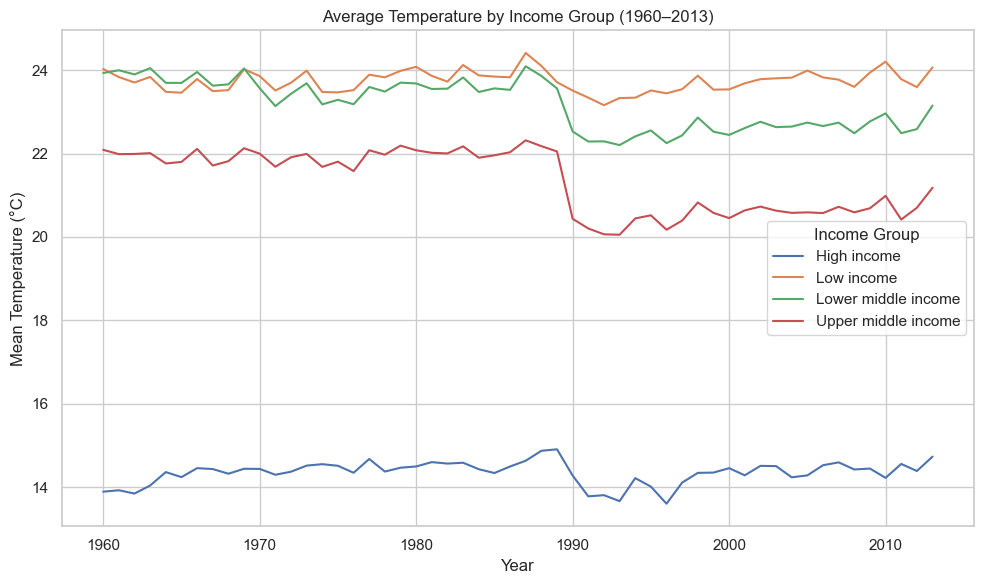

In [31]:
group_trends = final_df.groupby(["Year", "Income group"])["MeanTemp"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=group_trends, x="Year", y="MeanTemp", hue="Income group")
plt.title("Average Temperature by Income Group (1960–2013)")
plt.ylabel("Mean Temperature (°C)")
plt.xlabel("Year")
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

C:\Users\tanus\AppData\Local\Temp\ipykernel_31260\113672845.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\tanus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


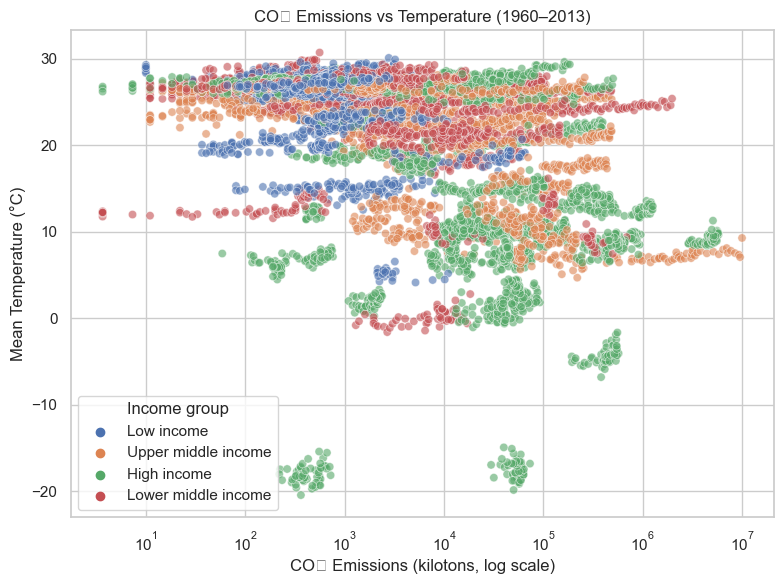

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x="CO2_kt", y="MeanTemp", hue="Income group", alpha=0.6)
plt.xscale("log")  # Optional: CO2 is skewed
plt.title("CO₂ Emissions vs Temperature (1960–2013)")
plt.xlabel("CO₂ Emissions (kilotons, log scale)")
plt.ylabel("Mean Temperature (°C)")
plt.tight_layout()
plt.show()

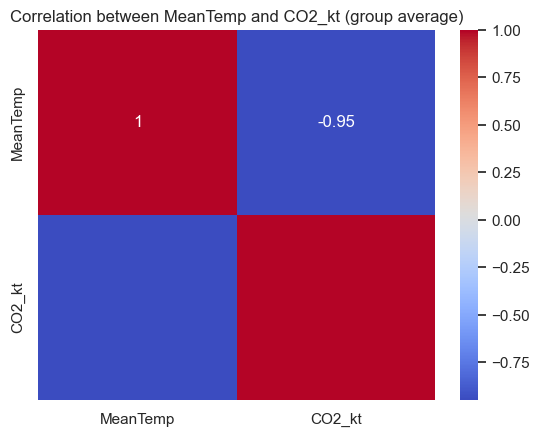

In [33]:
corr_df = final_df.groupby("Income group")[["MeanTemp", "CO2_kt"]].mean().reset_index()
sns.heatmap(corr_df.drop("Income group", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between MeanTemp and CO2_kt (group average)")
plt.show()

C:\Users\tanus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


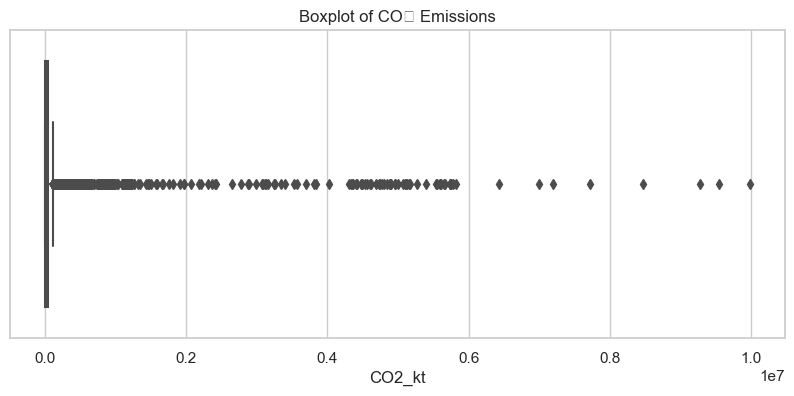

In [34]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=final_df["CO2_kt"])
plt.title("Boxplot of CO₂ Emissions")
plt.show()

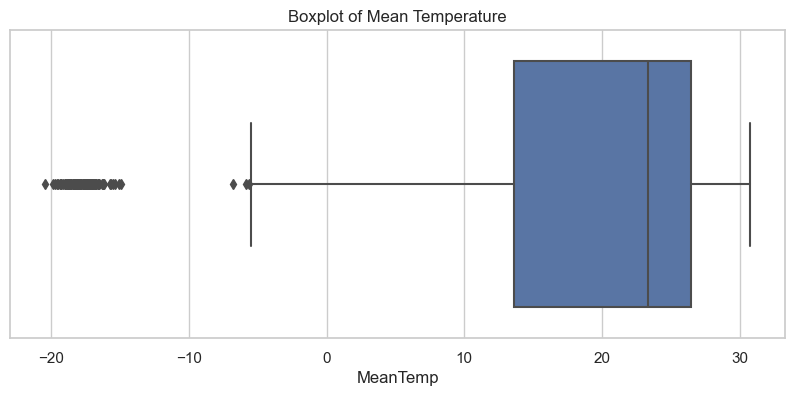

In [35]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=final_df["MeanTemp"])
plt.title("Boxplot of Mean Temperature")
plt.show()

**Feature Engineering**

Adding temperature change year by year

In [38]:
final_df["Temp_change"] = final_df.groupby("Country")["MeanTemp"].diff()

In [39]:
final_df = final_df.dropna(subset=["Temp_change"])

Top 10 countries with most warming

In [41]:
warming_rate = final_df.groupby("Country")["Temp_change"].mean().dropna().sort_values(ascending=False).head(10)
print("Top 10 Warming Countries by Avg Annual Temp Change:")
print(warming_rate)

Top 10 Warming Countries by Avg Annual Temp Change:
Country
Uzbekistan      0.118486
Turkmenistan    0.116830
Kazakhstan      0.103543
Azerbaijan      0.094864
Armenia         0.090681
Georgia         0.080103
Serbia          0.071632
Montenegro      0.070774
Mongolia        0.068006
Ukraine         0.065768
Name: Temp_change, dtype: float64


**Modelling**

Preparing for regression

In [44]:
reg_df = final_df.dropna(subset=["MeanTemp", "CO2_kt"])
X = reg_df[["CO2_kt"]]
y = reg_df["MeanTemp"]

Scaling for better fit

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fitting model

In [48]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [49]:
print("Regression Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X_scaled, y))

Regression Coefficient: -1.6489938967616666
Intercept: 19.732481992006704
R² Score: 0.03416995847480642


In [50]:
final_df.to_csv("global_temp_income_co2_1960_2013.csv", index=False)